In [ ]:
#@title Kaggle Setup To Download The Data
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#@title Download and Unzip The Data
#Don't download the images, file size too large
! kaggle competitions download h-and-m-personalized-fashion-recommendations -f articles.csv
! kaggle competitions download h-and-m-personalized-fashion-recommendations -f customers.csv
! kaggle competitions download h-and-m-personalized-fashion-recommendations -f transactions_train.csv
! unzip articles.csv.zip
! unzip customers.csv.zip
! unzip transactions_train.csv.zip

In [4]:
#@title Library Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tqdm import tqdm

In [7]:
#@title Load The Data
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions_train.csv')

#EDA

## Let's start with the articles data and take a look at the features

# Articles

-  <b>article_id(int)</b>: Id of the clothing
-  <b>product_code(int)</b>
-  <b>prod_name(str)</b>: Name of the product, includes category information
-  <b>product_type_no(int)</b>: Category code, can be based on product_group_name
-  <b>product_type_name(str)</b>: Subcategory name (ie: trousers, leggins, pants)
-  <b>product_group_name(str)</b>: Product category (ie: underwear, garment upper body)
-  <b>graphical_appearance_no(int)</b>
-  <b>graphical_appearance_name(str)</b>: Describes if the clothing has any design or pattern on it. (ie: solid, stripe)
-  <b>colour_group_code(int), colour_group_name(str)</b>
-  <b>perceived_colour_value_id(int), perceived_colour_value_name(str)</b>
-  <b>perceived_colour_master_id(int), perceived_colour_master_name(str)</b>
-  <b>department_no(int), department_name(str)</b>
-  <b>index_code(str), index_name(str)</b>
-  <b>index_group_no(int),index_group_name(str)</b>

This file contains products information regarding color, category, subcategory, design pattern etc. 5 columns are not shown as they exceed the limit of 20 columns and they are:

In [53]:
#@title
articles.columns[20:]

Index(['section_no', 'section_name', 'garment_group_no', 'garment_group_name',
       'detail_desc'],
      dtype='object')

In [12]:
#@title
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [25]:
#@title
print("The size of the articles file is: ", articles.shape, "\n")
print("The number of null entries in 105542 rows for each feature are:\n")
articles.isnull().sum()

The size of the articles file is:  (105542, 25) 

The number of null entries in 105542 rows for each feature are:



article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

This is a relatively large dataset with 100k+ rows of data. And almost none of the feature have any missing values, except for detail_desc which is not visible here.

In [26]:
#@title
print("The number of items in each category are:\n")
pd.value_counts(articles['index_name'])

The number of items in each category are:



Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

Ladieswear, Divided, Menswear and Children categories make up most of the data. Let's visualize this with a distplot.

Let's look at the distribution of products for each category, which is product_group_name.

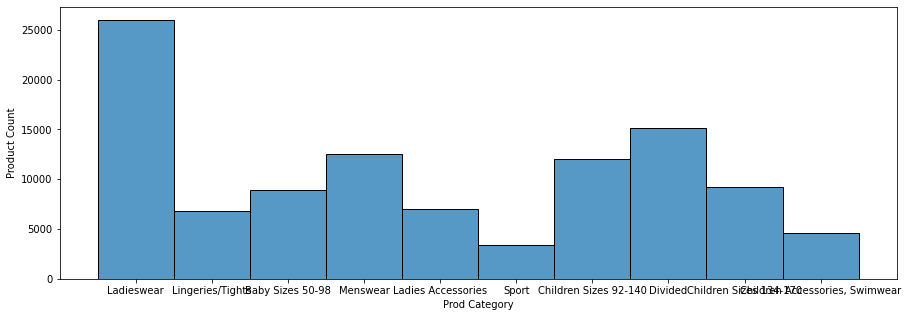

In [42]:
#@title Dist Plot For Category Distributions
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=articles, x='index_name')
ax.set_xlabel('Prod Category')
ax.set_ylabel('Product Count')
plt.show()

It can now be seen easier that the dominant category is Ladieswear, which has almost as much products as Divided (unisex products of h&m) and Menswear combined.

### Distribution of Categories (menswear, ladieswear, divided etc.) in the product categories (trousers, shirts etc.)

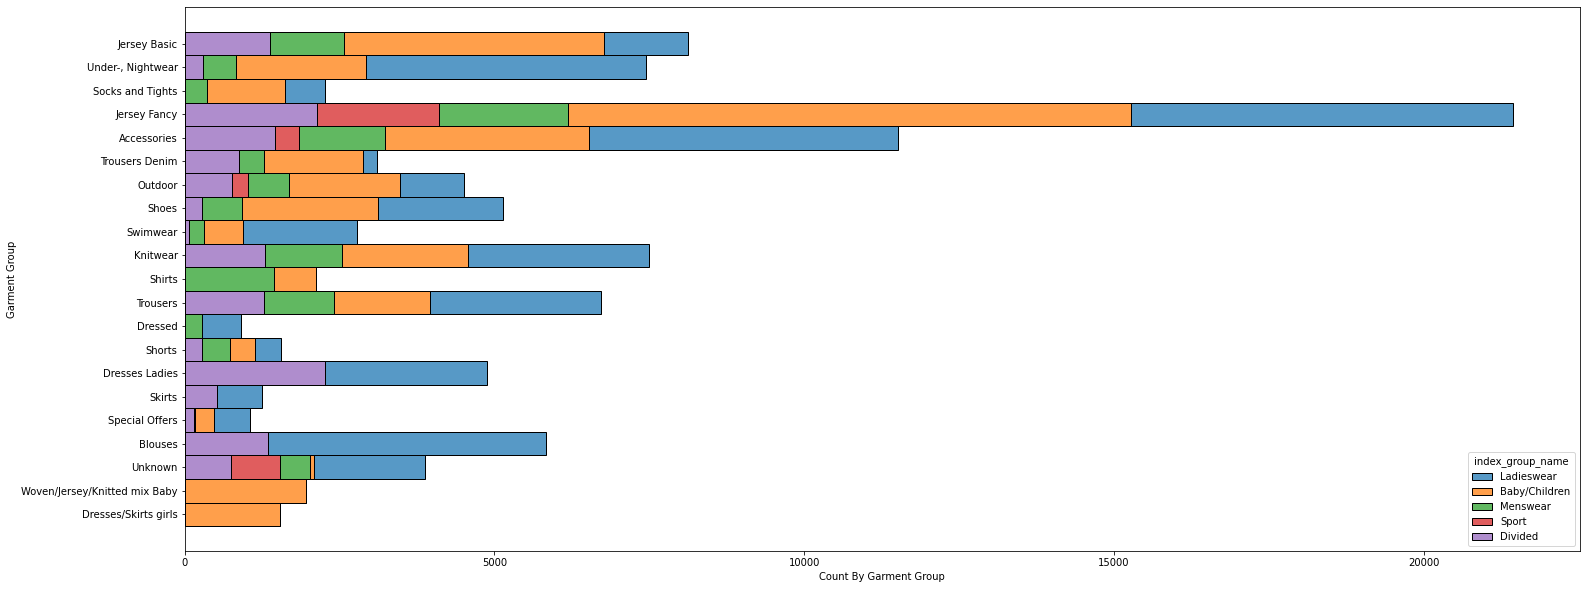

In [57]:
#@title
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple='stack')
ax.set_xlabel('Count By Garment Group')
ax.set_ylabel('Garment Group')
plt.show()

Distribution of Categories (menswear, ladieswear, divided etc.) in the product categories (trousers, shirts etc.)